# Analysis of haploid data and Comparison with diploid data

Data of haploid data: `/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/LD_haploid/17_gene_level_curve_fitting/Gene_level_statistics_fitted.tsv`

Data of diploid data: `/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/HD_DIT_HAP_generationPLUS1/17_gene_level_curve_fitting/Gene_level_statistics_fitted.tsv`

## 1. Import modules

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("/data/c/yangyusheng_optimized/DIT_HAP_pipeline/config/DIT_HAP.mplstyle")
AX_WIDTH, AX_HEIGHT = plt.rcParams['figure.figsize']
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

## 2. Load data

In [18]:
haploid_data = pd.read_csv('/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/LD_haploid/17_gene_level_curve_fitting/gene_level_fitting_statistics.tsv', sep='\t')
diploid_data = pd.read_csv('/data/c/yangyusheng_optimized/DIT_HAP_pipeline/results/HD_DIT_HAP_generationPLUS1/17_gene_level_curve_fitting/gene_level_fitting_statistics.tsv', sep='\t')

haploid_coverage = pd.read_csv('/data/c/yangyusheng_optimized/DIT_HAP_pipeline/reports/LD_haploid/insertion_density_analysis/insertion_density_analysis.csv', sep='\t')
diploid_coverage = pd.read_csv('/data/c/yangyusheng_optimized/DIT_HAP_pipeline/reports/HD_DIT_HAP_generationPLUS1/insertion_density_analysis/insertion_density_analysis.csv', sep='\t')

common_columns = ["Systematic ID", "Name", "FYPOviability", "DeletionLibrary_essentiality"]

haploid_data.columns = [ c if c in common_columns else f"{c}_haploid" for c in haploid_data.columns]
diploid_data.columns = [ c if c in common_columns else f"{c}_diploid" for c in diploid_data.columns]

haploid_coverage.columns = [ c if c in common_columns else f"{c}_haploid" for c in haploid_coverage.columns]
diploid_coverage.columns = [ c if c in common_columns else f"{c}_diploid" for c in diploid_coverage.columns]

merged_data = pd.merge(haploid_data, diploid_data, on=common_columns, how='inner')
merged_coverage = pd.merge(haploid_coverage, diploid_coverage, on=common_columns[:2], how='inner')

# 3. Compare the data

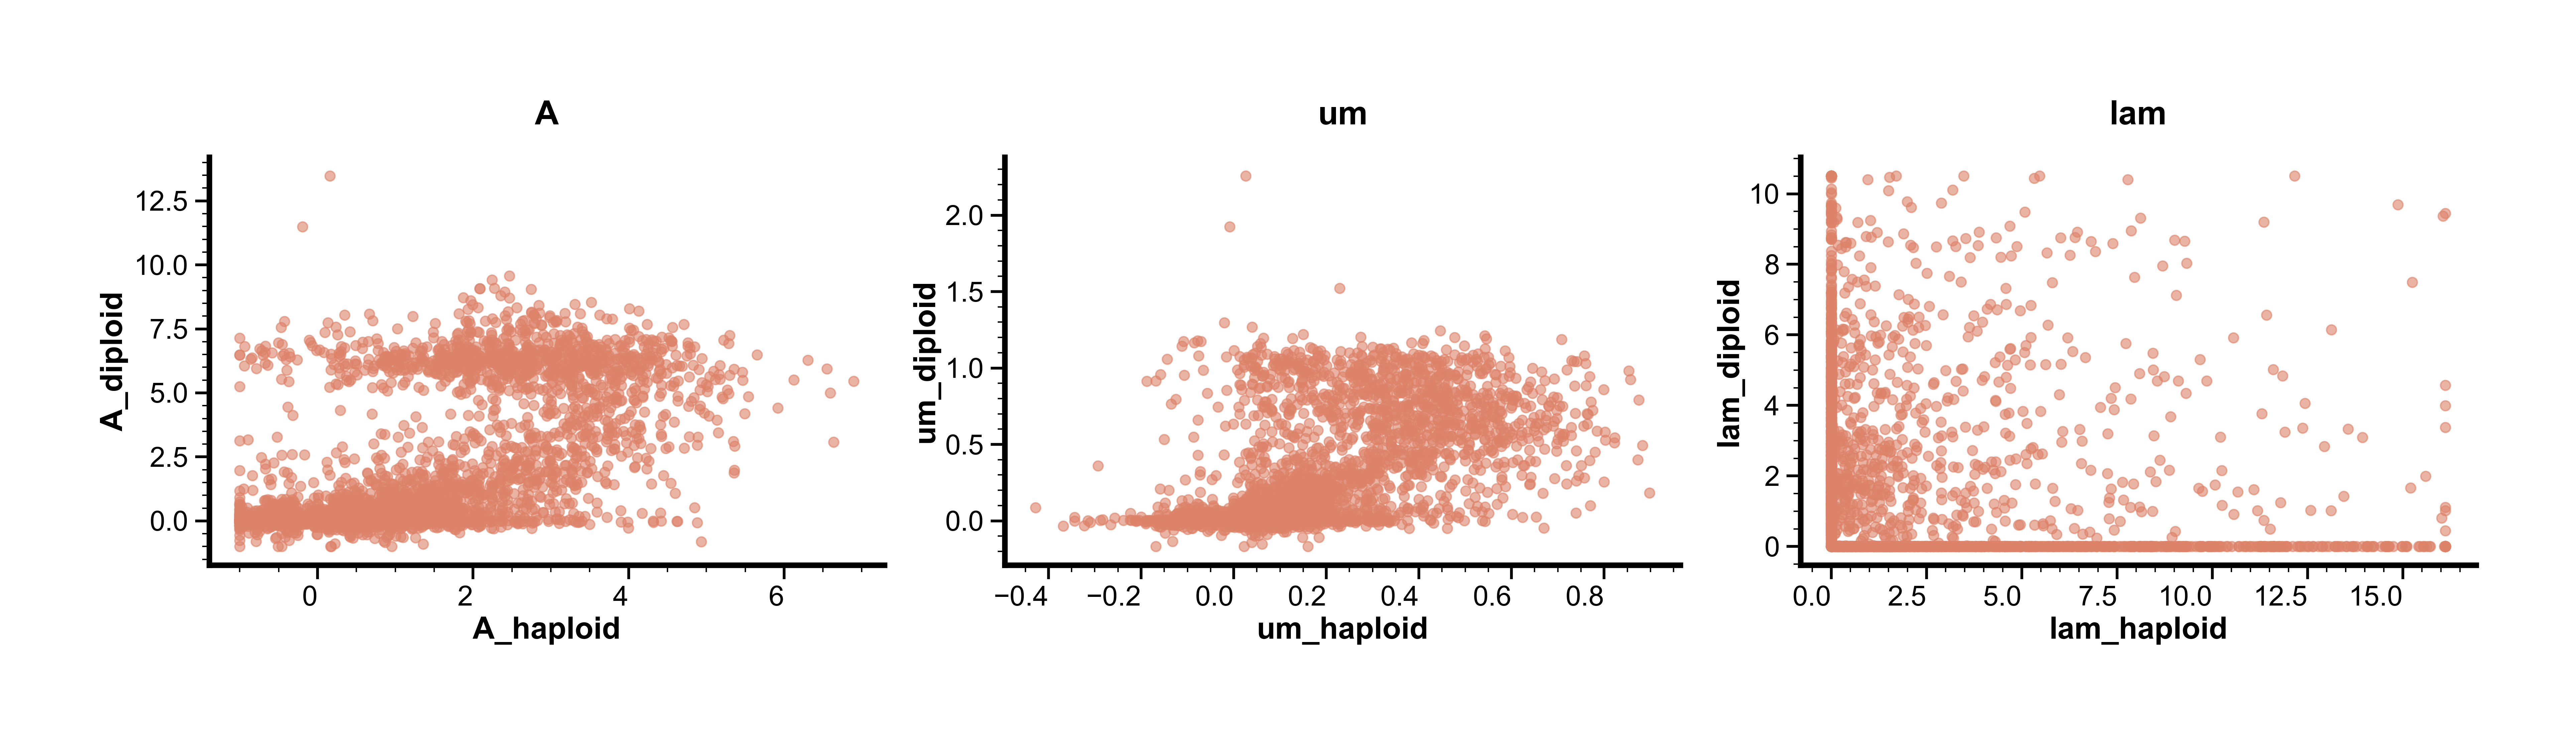

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(3*AX_WIDTH, AX_HEIGHT))

# compare the A
x = merged_data['A_haploid']
y = merged_data['A_diploid']

axes[0].scatter(x, y, alpha=0.6, s=50)
axes[0].set_xlabel('A_haploid')
axes[0].set_ylabel('A_diploid')
axes[0].set_title('A')

# compare the um
x = merged_data['um_haploid']
y = merged_data['um_diploid']

axes[1].scatter(x, y, alpha=0.6, s=50)
axes[1].set_xlabel('um_haploid')
axes[1].set_ylabel('um_diploid')
axes[1].set_title('um')

# compare the lam
x = merged_data['lam_haploid']
y = merged_data['lam_diploid']

axes[2].scatter(x, y, alpha=0.6, s=50)
axes[2].set_xlabel('lam_haploid')
axes[2].set_ylabel('lam_diploid')
axes[2].set_title('lam')

plt.show()
plt.close()

In [20]:
merged_data["delta_A"] = merged_data["A_diploid"] - merged_data["A_haploid"]
merged_data["delta_um"] = merged_data["um_diploid"] - merged_data["um_haploid"]
merged_data["delta_lam"] = merged_data["lam_diploid"] - merged_data["lam_haploid"]

In [23]:
high_insertion_density_genes = merged_coverage.query("total_insertions_haploid >=8")
sig_different_genes = merged_data.query("delta_um > 0.3 and delta_A > 1 and `Systematic ID` in @high_insertion_density_genes['Systematic ID']").sort_values(["FYPOviability"])#.filter(regex="^YES(?!.*fitted)(?!.*residual)")

In [24]:
sig_different_genes

,Systematic ID,Name,FYPOviability,DeletionLibrary_essentiality,time_points_haploid,Status_haploid,A_haploid,um_haploid,lam_haploid,R2_haploid,...,YES3_fitted_diploid,YES4_fitted_diploid,YES0_residual_diploid,YES1_residual_diploid,YES2_residual_diploid,YES3_residual_diploid,YES4_residual_diploid,delta_A,delta_um,delta_lam
1913,SPBC119.17,cym1,condition-dependent,E,"0.0,0.553,2.097,5.629,8.831,12.203,15.818,19.081",Success,3.556,0.566,2.227,0.997280,...,5.497,6.185,-0.003,-0.030,0.041,-0.063,0.037,2.912,0.342,0.495
771,SPAC22F8.11,plc1,condition-dependent,V,"0.0,0.553,2.097,5.629,8.831,12.203,15.818,19.081",Success,2.184,0.366,-0.000,0.965263,...,5.406,6.361,-0.053,0.064,-0.111,0.131,-0.063,4.831,0.382,2.017
925,SPAC25B8.06c,dia4,condition-dependent,E,"0.0,0.553,2.097,5.629,8.831,12.203,15.818,19.081",Success,2.716,0.260,0.301,0.990137,...,3.644,5.210,0.000,0.275,-0.007,0.001,0.000,3.037,0.698,5.860
3767,SPCC330.04c,tdk1,condition-dependent,E,"0.0,0.553,2.097,5.629,8.831,12.203,15.818,19.081",Success,0.848,0.073,-0.000,0.944668,...,4.539,4.997,-0.017,-0.005,0.001,0.000,0.000,4.344,0.636,2.004
3736,SPCC297.03,ssp1,condition-dependent,V,"0.0,0.553,2.097,5.629,8.831,12.203,15.818,19.081",Success,2.734,0.331,-0.000,0.909516,...,1.480,4.148,0.000,0.840,1.117,-0.194,0.058,4.041,0.505,8.373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,SPAC19A8.03,ymr1,viable,V,"0.0,0.553,2.097,5.629,8.831,12.203,15.818,19.081",Success,-0.193,-0.009,-0.000,-0.060139,...,0.436,5.686,0.000,0.115,0.470,-0.180,0.014,11.680,1.933,10.511
3219,SPBC887.18c,hfi1,viable,V,"0.0,0.553,2.097,5.629,8.831,12.203,15.818,19.081",Success,1.765,0.149,-0.000,0.949062,...,2.062,2.744,0.000,0.218,-0.152,0.203,-0.126,1.202,0.348,5.689
412,SPAC17C9.05c,pmc3,viable,V,"0.0,0.553,2.097,5.629,8.831,12.203,15.818,19.081",Success,2.272,0.229,12.162,0.973405,...,0.345,4.496,0.000,0.105,-0.008,-0.024,0.002,6.810,1.293,-1.651
1158,SPAC328.01c,msn5,viable,V,"0.0,0.553,2.097,5.629,8.831,12.203,15.818,19.081",Success,0.702,0.118,6.202,0.838057,...,2.784,3.826,0.000,0.152,-0.639,0.770,-0.466,3.472,0.581,-0.279


In [25]:
sig_different_genes.query("Name == 'meu23'")

,Systematic ID,Name,FYPOviability,DeletionLibrary_essentiality,time_points_haploid,Status_haploid,A_haploid,um_haploid,lam_haploid,R2_haploid,...,YES3_fitted_diploid,YES4_fitted_diploid,YES0_residual_diploid,YES1_residual_diploid,YES2_residual_diploid,YES3_residual_diploid,YES4_residual_diploid,delta_A,delta_um,delta_lam
3906,SPCC613.11c,meu23,viable,V,"0.0,0.553,2.097,5.629,8.831,12.203,15.818,19.081",Success,0.119,0.012,0.0,0.185094,...,2.193,2.274,-0.023,-0.131,0.285,-0.112,-0.072,2.178,0.373,1.157
